# Ejercicio 02  R

## Datos

In [1]:
df = read.csv('Rendimiento_de_gasolina.csv')

In [2]:
df

Automóvil,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
Apollo,18.90,350.0,165,260,8.00,2.56,4,3,200.3,69.9,3910,1
Omega,17.00,350.0,170,275,8.50,2.56,4,3,199.6,72.9,3860,1
Nova,20.00,250.0,105,185,8.25,2.73,1,3,196.7,72.2,3510,1
Monarch,18.25,351.0,143,255,8.00,3.00,2,3,199.9,74.0,3890,1
Duster,20.07,225.0,95,170,8.40,2.76,1,3,194.1,71.8,3365,0
Jenson Conv.,11.20,440.0,215,330,8.20,2.88,4,3,184.5,69.0,4215,1
Skyhawk,22.12,231.0,110,175,8.00,2.56,2,3,179.3,65.4,3020,1
Monza,21.47,262.0,110,200,8.50,2.56,2,3,179.3,65.4,3180,1
Scirocco,34.70,89.7,70,81,8.20,3.90,2,4,155.7,64.0,1905,0


## a)
Ajustar un modelo de regresión lineal múltiple que relacione el rendimiento de la gasolina $y$, en millas por galón, la cilindrada del motor ($x_1$) y la cantidad de gargantas del carburador ($x_6$)

In [25]:
X = model.matrix(y ~ x1 + x6, data = df)
y = df$y
n = nrow(X)
p = ncol(X)

In [26]:
beta_hat = solve(t(X) %*% X) %*% t(X) %*% y
beta_hat

(Intercept),32.88455083
x1,-0.05314767
x6,0.95922305


In [27]:
y_hat = X %*% beta_hat

In [28]:
SCT = as.numeric(t(y) %*% y - sum(y)**2 / n)
SCE = as.numeric(t(beta_hat) %*% t(X) %*% y - sum(y)**2 / n)
SSE = SCT - SCE
varest = SSE / (n-p)
cov_beta = varest * solve(t(X) %*% X)
se_beta = sqrt(diag(cov_beta))

---

In [29]:
full_model = lm(formula=y ~ x1 + x6, data=df)

In [30]:
summary(full_model)


Call:
lm(formula = y ~ x1 + x6, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0623 -1.6687 -0.3628  1.6221  6.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.884551   1.535408  21.417  < 2e-16 ***
x1          -0.053148   0.006137  -8.660 1.55e-09 ***
x6           0.959223   0.670277   1.431    0.163    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.013 on 29 degrees of freedom
Multiple R-squared:  0.7873,	Adjusted R-squared:  0.7726 
F-statistic: 53.67 on 2 and 29 DF,  p-value: 1.79e-10


## b)
Formar la tabla de análisis de varianza y probar la significancia de la regresión.

In [31]:
GLT = n - 1
GLRes = n - p
GLR = p - 1
CMR = SCE/GLR
CMRes = SSE/GLRes
F_stat = CMR/CMRes
p_value_F <- pf(F_stat, GLR, GLRes, lower.tail = FALSE)

In [32]:
F_stat

[1] 53.66882

In [33]:
p_value_F

[1] 1.789954e-10

In [34]:
anova_manual <- data.frame(
  Source = c("Regression", "Residual", "Total"),
  Df = c(GLR, GLRes, GLR + GLRes),
  SumSq = c(SCE, SSE, SCT),
  MeanSq = c(CMR, CMRes, NA),
  F = c(F_stat, NA, NA),
  "Pr(>F)" = c(p_value_F, NA, NA)
)
print("ANOVA (manual)")
print(anova_manual)

[1] "ANOVA (manual)"
      Source Df     SumSq     MeanSq        F       Pr..F.
1 Regression  2  974.3095 487.154770 53.66882 1.789954e-10
2   Residual 29  263.2345   9.077053       NA           NA
3      Total 31 1237.5441         NA       NA           NA


---

In [35]:
anov = anova(full_model)
anov

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,955.71971,955.719710,105.289643,3.666052e-11
x6,1,18.58983,18.589831,2.048003,1.630948e-01
Residuals,29,263.23455,9.077053,NA,NA


## c)
Calcular $R^2$ y $R^2_{adj}$ para este modelo. Compararlas con las $R^2$ y $R^2_{adj}$ ajustado para el modelo de regresión lineal simple, que relaciona las millas con la cilindrada.

In [37]:
R2 = 1 - (SSE/SCT)
R2_adj = 1 - ((SSE / (n - p)) / (SCT / (n - 1)))
R2
R2_adj

[1] 0.7872928

[1] 0.7726233

### Regresión simple

In [38]:
X_simple = model.matrix(y ~ x1, data=df)
y_simple = df$y
n_s = nrow(X_simple)
p_s = ncol(X_simple)

beta_hat_simple = solve(t(X_simple) %*% X_simple) %*% t(X_simple) %*% y_simple
y_hat_simple = X_simple %*% beta_hat_simple

SCT_simple = as.numeric(t(y_simple) %*% y_simple - sum(y_simple)**2 / n_s)
SCE_simple = as.numeric(t(beta_hat_simple) %*% t(X_simple) %*% y_simple - sum(y)**2 / n_s)
SSE_simple = SCT_simple - SCE_simple

varest = as.numeric(SSE_simple / n_s - p_s)

R2_simple = 1 - (SSE_simple/SCT_simple)
R2_adj_simple = 1 - ((SSE_simple / (n_s - p_s)) / (SCT_simple / (n_s - 1)))

R2_simple
R2_adj_simple

[1] 0.7722712

[1] 0.7646803

## d)
Determinar un intervalo de confianza para $\beta_1$

In [42]:
tt = qt(p=0.95+0.05/2, df=n-p, lower.tail=TRUE)
beta1_hat = beta_hat[2, 1]
se_beta1 = se_beta[2]
ic_beta1_izq = beta1_hat - tt * se_beta1
ic_beta1_der = beta1_hat + tt * se_beta1

In [43]:
cat("Intervalo de confianza 95% para β1:\n")
cat("Límite inferior:", round(ic_beta1_izq, 4), "\n")
cat("Estimación:", round(beta1_hat, 4), "\n")
cat("Límite superior:", round(ic_beta1_der, 4), "\n")
cat("Longitud:", round(ic_beta1_der - ic_beta1_izq, 4), "\n")

Intervalo de confianza 95% para β1:
Límite inferior: -0.0657 
Estimación: -0.0531 
Límite superior: -0.0406 
Longitud: 0.0251 


In [44]:
confint(full_model, level = 0.95)["x1", ]

2.5 %      97.5 % 
-0.06569892 -0.04059641

## e)
Determinar un intervalo de confianza de 95% para el rendimiento promedio de la gasolina, cuando $x_1 = 225 pulg^3$ y $x_6 = 2$ gargantas.



In [50]:
X0 = matrix(c(1, 255, 2))
y0 = t(X0) %*% beta_hat

In [51]:
var_y0 = varest * t(X0) %*% solve(t(X) %*% X) %*% X0
se_y0 = sqrt(var_y0)

In [52]:
ic_y0_izq <- y0 - tt * se_y0
ic_y0_der <- y0 + tt * se_y0

In [53]:
cat("\nIntervalo de confianza 95% para la respuesta media:\n")
cat("Límite inferior:", round(ic_y0_izq, 4), "\n")
cat("Predicción:", round(y0, 4), "\n")
cat("Límite superior:", round(ic_y0_der, 4), "\n")
cat("Longitud:", round(ic_y0_der-ic_y0_izq, 4), "\n")


Intervalo de confianza 95% para la respuesta media:
Límite inferior: 19.9907 
Predicción: 21.2503 
Límite superior: 22.51 
Longitud: 2.5193 


## f)
Determinar un intervalo de predicción de 95% para una nueva observación de rendimiento de gasolina, cuando $x_1 = 225 pulg^3$ y $x_6=2$ gargantas.

In [60]:
X0 <- matrix(c(1, 225, 2), nrow = 1)   # si el modelo tiene intercepto, x1 y x6

# error estándar de predicción
se_pred <- sqrt(varest) * sqrt(1 + as.numeric(X0 %*% XtX_inv %*% t(X0)))

# valor t crítico
alpha <- 0.05
t_crit <- qt(1 - alpha/2, df = n - p)

# predicción puntual
y0 <- as.numeric(X0 %*% beta_hat)

# intervalo de predicción
ip_izq = y0 - t_crit * se_pred
ip_der = y0 + t_crit * se_pred


In [61]:
cat("\nIntervalo de predicción 95% para la respuesta media:\n")
cat("Límite inferior:", round(ip_izq, 4), "\n")
cat("Predicción:", round(y0, 4), "\n")
cat("Límite superior:", round(ip_der, 4), "\n")
cat("Longitud:", round(ip_der-ip_izq, 4), "\n")


Intervalo de predicción 95% para la respuesta media:
Límite inferior: 16.5537 
Predicción: 22.8448 
Límite superior: 29.1358 
Longitud: 12.5821 


## g)
Considerar el modelo de regresión lineal simple, que relaciona las millas con la cilindrada. Construir un intervalo de confianza de 95% para el rendimiento promedio de la gasolina y un intervalo de predicción para el rendimiento, cuando $x_1 = 225 pulg^3$
 . Comparar las longitudes de estos intervalos con los intervalos obtenidos en los dos incisos anteriores. ¿Tiene ventajas agregar $x_6$ al modelo?

In [ ]:
x1 = 

## h)
Trazar una gráfica de probabilidad normal de los residuales. ¿Parece haber algún problema con la hipótesis de normalidad?

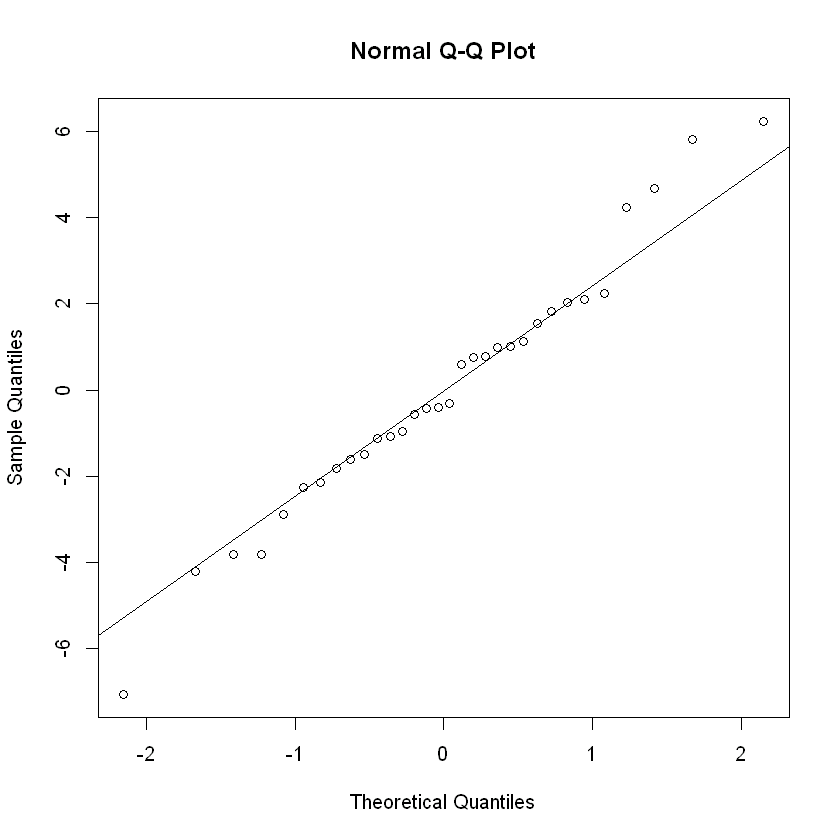

In [62]:
residuales = resid(full_model)
qqnorm(residuales)
qqline(residuales)

## i)
Trazar e interpretar una gráfica de los residuales en función de la respuesta predicha.

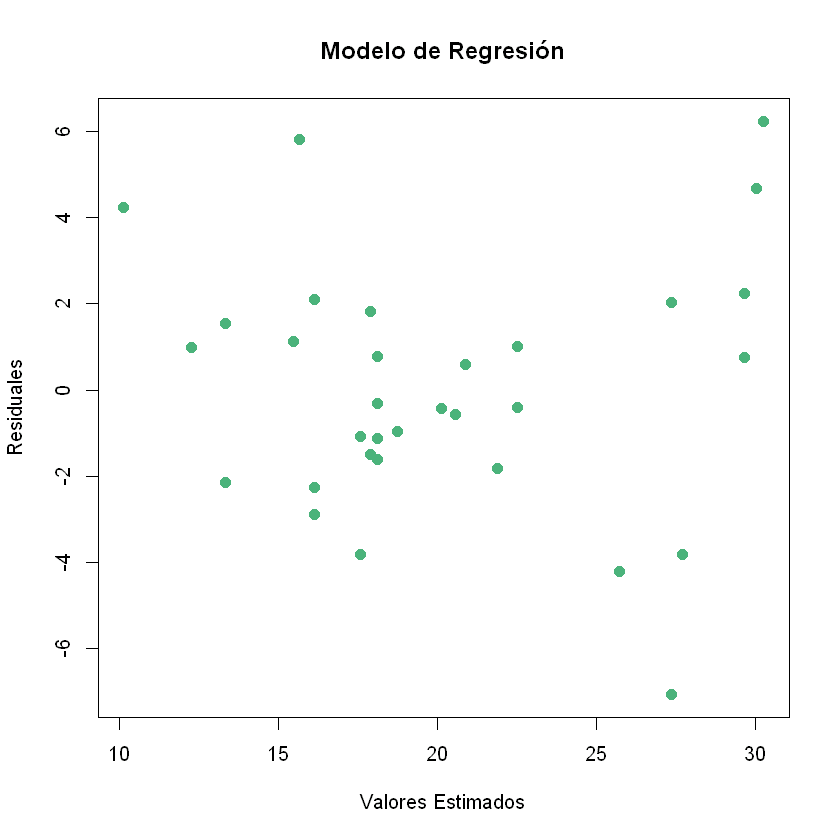

In [63]:
plot(fitted(full_model), residuales,
    xlab = "Valores Estimados",
     ylab = "Residuales",
     main = "Modelo de Regresión",
     pch = 19, col = "#4bb37b", cex = 1.2)

## j)
Trazar las gráficas de los residuales en función de cada una de las variables regresoras. ¿Implican esas gráficas que se especificó en forma correcta el regresor?

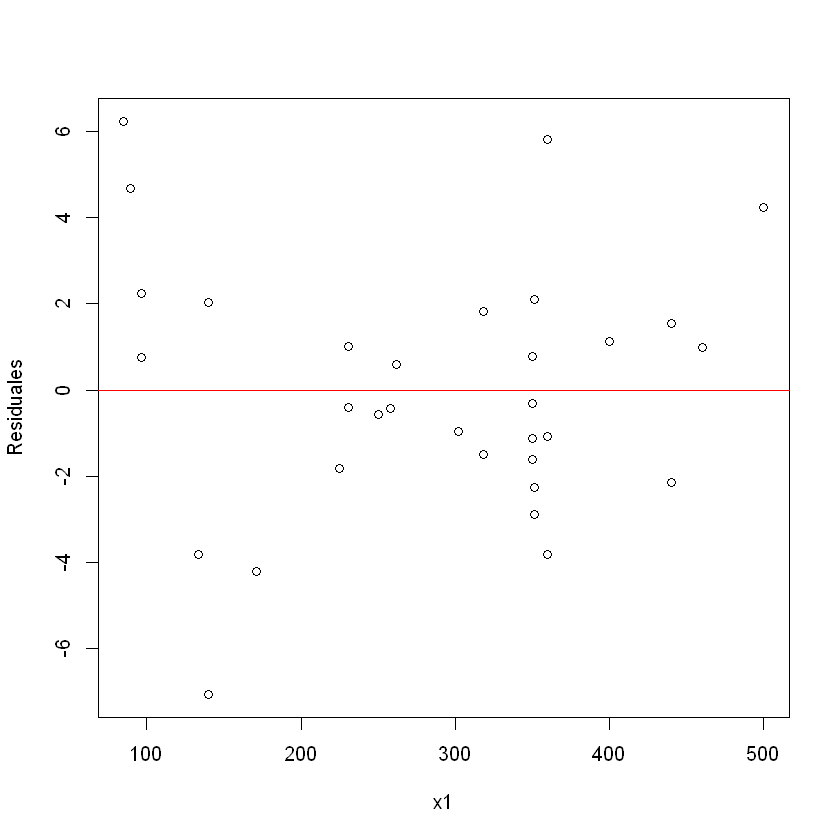

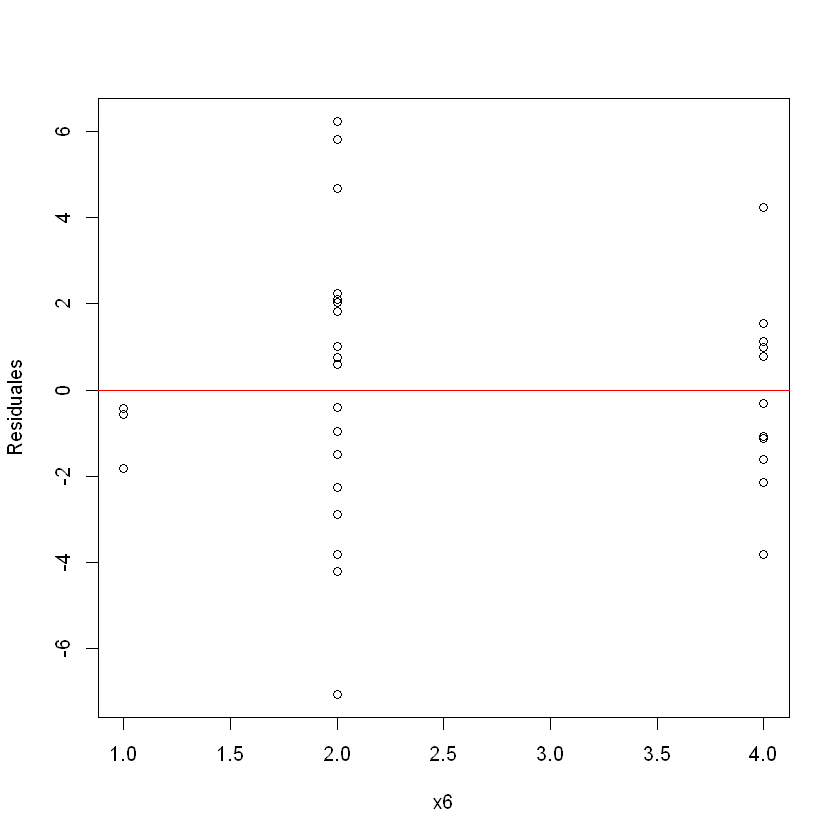

In [64]:
plot(df$x1, residuales, xlab="x1", ylab="Residuales")
abline(h=0, col="red")

plot(df$x6, residuales, xlab="x6", ylab="Residuales")
abline(h=0, col="red")
